In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import RandomOverSampler # for add  more of sample if not have 

In [3]:
cols = ["G" , "C" , "B" , "A" , "Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc"] 
# G , C , B , A is OutPut
# Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc is Input
df = pd.read_csv("../../../classData.csv")
cols[4:]


['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

<ipython-input-4-da5da29d73ed>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_faults))


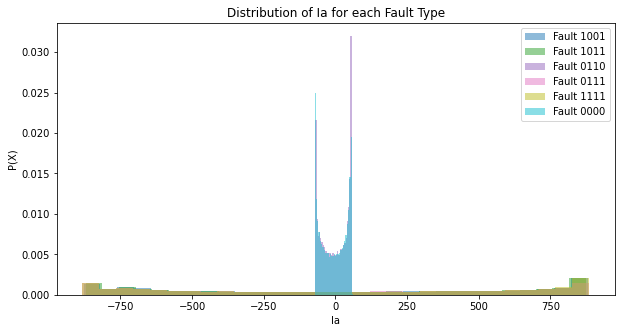

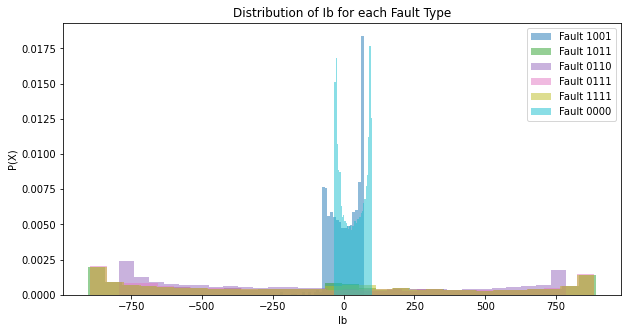

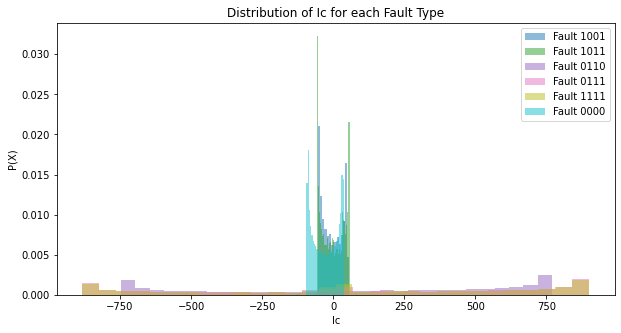

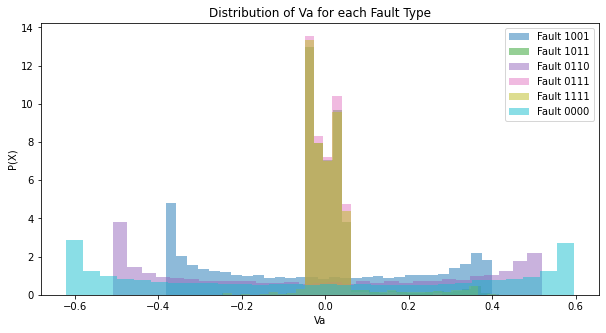

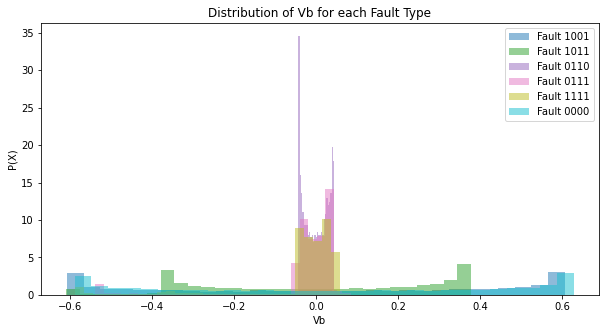

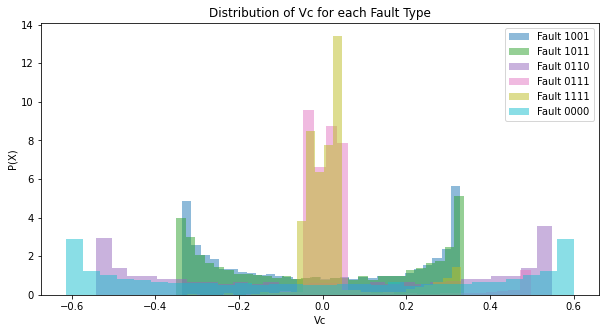

In [4]:
# for label in cols[:-1]:
#     plt.hist(df[df["G"] == 1][label] , color= 'blue' , label="Positive" , alpha = 0.6 , density = True )
#     plt.hist(df[df["G"] == 0][label] , color= 'red' , label="Negative" , alpha = 0.6 , density = True )
#     plt.title(label)
#     plt.ylabel("P(X)")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()
# Combine outputs into one class label like '1001'
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)

input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
unique_faults = df['fault_type'].unique()

colors = plt.cm.get_cmap('tab10', len(unique_faults))

for in_col in input_cols:
    plt.figure(figsize=(10, 5))
    for i, fault in enumerate(unique_faults):
        subset = df[df['fault_type'] == fault]
        plt.hist(subset[in_col], bins=30, alpha=0.5, density=True,
                 label=f'Fault {fault}', color=colors(i))
    
    plt.title(f"Distribution of {in_col} for each Fault Type")
    plt.xlabel(in_col)
    plt.ylabel("P(X)")
    plt.legend()

## Train and Validation and Test dataSet

In [6]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])

In [7]:
def scale_dataset(dataFrame):
    x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    y = dataFrame[['G', 'C', 'B', 'A']].values


    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    data = np.hstack((x, y))

    return data , x, y

In [8]:
# print(len(train[train["G"] == 1] ))
# print(len(train[train["G"] == 0] ))
train , X_train , Y_train = scale_dataset(train)
valid , X_valid , Y_valid = scale_dataset(valid)
test , X_test , Y_test = scale_dataset(test)

# Models

## KNN

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5) # how much neghibor that will effect him
knn_model.fit(X_train , Y_train)
 

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       670
           1       1.00      0.96      0.98       659
           2       1.00      0.98      0.99       863
           3       1.00      1.00      1.00       889

   micro avg       0.96      0.95      0.96      3081
   macro avg       0.96      0.94      0.95      3081
weighted avg       0.96      0.95      0.96      3081
 samples avg       0.68      0.67      0.67      3081



c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_p

In [ ]:
# print(df['G'].value_counts())



To understand this result need to know that is mean Precision and Recall
![alt text](image.png)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:

fault_labels = Y_train.dot(np.array([8, 4, 2, 1]))
fault_labels_test = Y_test.dot(np.array([8,4,2,1]))

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train ,fault_labels)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 9, 0, 6], shape=(1573,))

In [ ]:
print(classification_report(fault_labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       480
           6       0.91      0.91      0.91       204
           7       0.46      0.81      0.59       219
           9       0.86      0.88      0.87       230
          11       0.75      0.83      0.79       204
          15       0.33      0.02      0.03       236

    accuracy                           0.78      1573
   macro avg       0.71      0.74      0.69      1573
weighted avg       0.74      0.78      0.73      1573



this worst from the model of KNN 

## Logitic Regression